In [1]:
import os

os.chdir("/workspaces/example_digital-twin_incubator_twright/software/incubator")

In [2]:
import sys

sys.path.append("/workspaces/example_digital-twin_incubator_twright/software")

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = [60/2.54, 30/2.54]

## Incubator initial

In [6]:
from digital_twin.simulator.verified_plant_simulator import VerifiedPlantMonitor4Params

In [7]:
from verified_twin.lbuc import *

## Verified 4 Parameter Model

$$
    \frac{\mathrm d T_{\mathrm{system}}}{\mathrm d t} =
    \frac{1}{C_{\mathrm{system}}}\bigl(
        V I - G_{\mathrm{box}} \bigl(T_{\mathrm{system}} - T_{\mathrm{room}}\bigr)
    \bigr)
$$

$$
    \frac{\mathrm d T_{S}}{\mathrm d t} =
    \frac{1}{C_S}\bigl(
        V I - G_B \bigl(T_S - T_R\bigr)
    \bigr)
$$

In [8]:
import numpy as np

timepoints = [0.0, 22.0, 53.0, 75.0, 106.0, 128.0, 600]
heater_on =  [True, False, True, False, True, False, False]
room_temp = [21.25, 21.25, 21.25, 21.25, 21.25, 21.25, False]

In [9]:
from sage.all import RIF
import sage.all as sg

In [10]:
sg.var("T_A", "T_H")

(T_A, T_H)

### Test run

In [22]:
res, model = VerifiedPlantSimulator4Params().run_simulation(
    timepoints,
    RIF('[20.5935,24.5935]'),
    RIF('25'),
    room_temp,
    heater_on,
    68.20829072,
    0.73572788,
    243.45802367,
    0.87095429,
)

x = [0, 25, 3.?e1]
state = {'heater_on': True}
running for [22.000000000000000 .. 22.000000000000000] ...
x = [22.000000000?, 36.?, 3.?e1]
state = {'heater_on': False}
running for [30.999999999111523 .. 31.000000000892506] ...
x = [53.00000000?, 35.?, 3.?e1]
state = {'heater_on': True}
running for [21.999999997583117 .. 22.000000003307165] ...
x = [75.00000000?, 45.?, 29.?]
state = {'heater_on': False}
running for [30.999999993174029 .. 31.000000006831343] ...
x = [106.0000000?, 44.?, 31.?]
state = {'heater_on': True}
running for [21.999999991601654 .. 22.000000015245931] ...
x = [128.0000000?, 54.?, 34.?]
state = {'heater_on': False}
running for [471.99999997372304 .. 472.00000001852971] ...


In [23]:
res.values

[{'heater_on': False},
 {'heater_on': True},
 {'heater_on': False},
 {'heater_on': True},
 {'heater_on': False},
 {'heater_on': True},
 {'heater_on': False},

In [24]:
import sage.all as sg

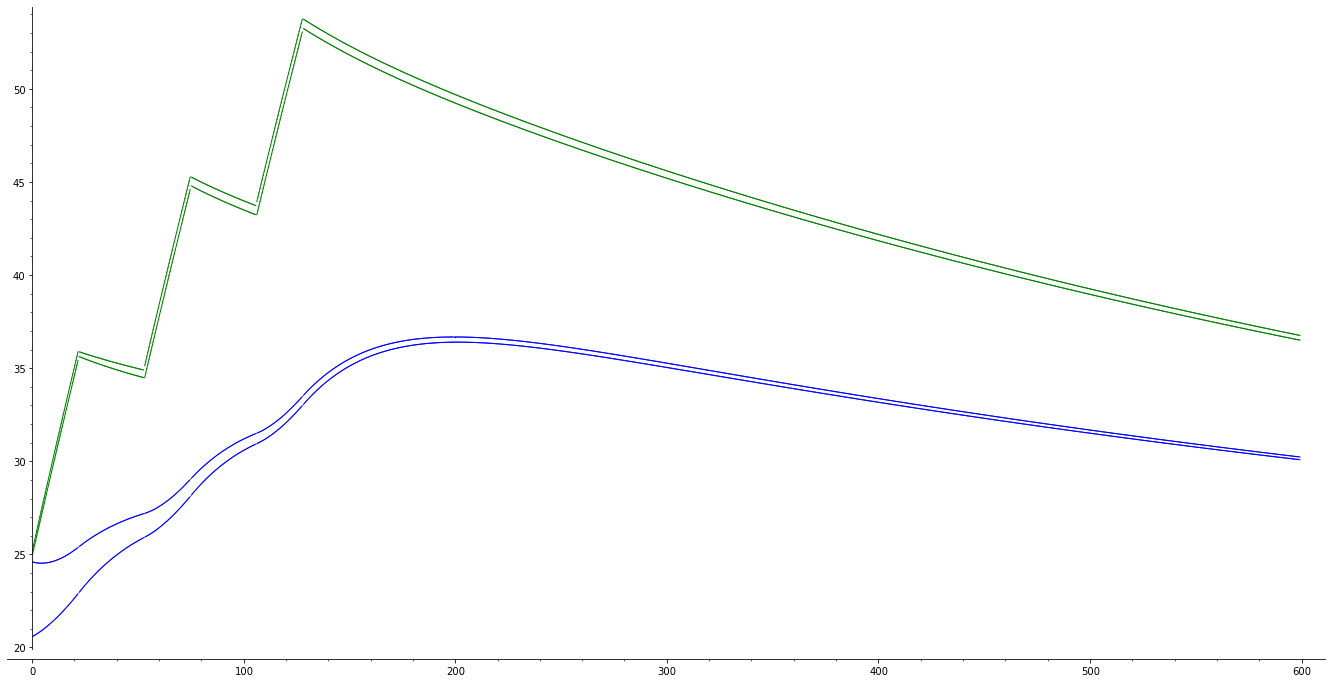

In [25]:
p = res.plot(('T_A', 'T_H'), color=('blue', 'green'))
p.matplotlib()

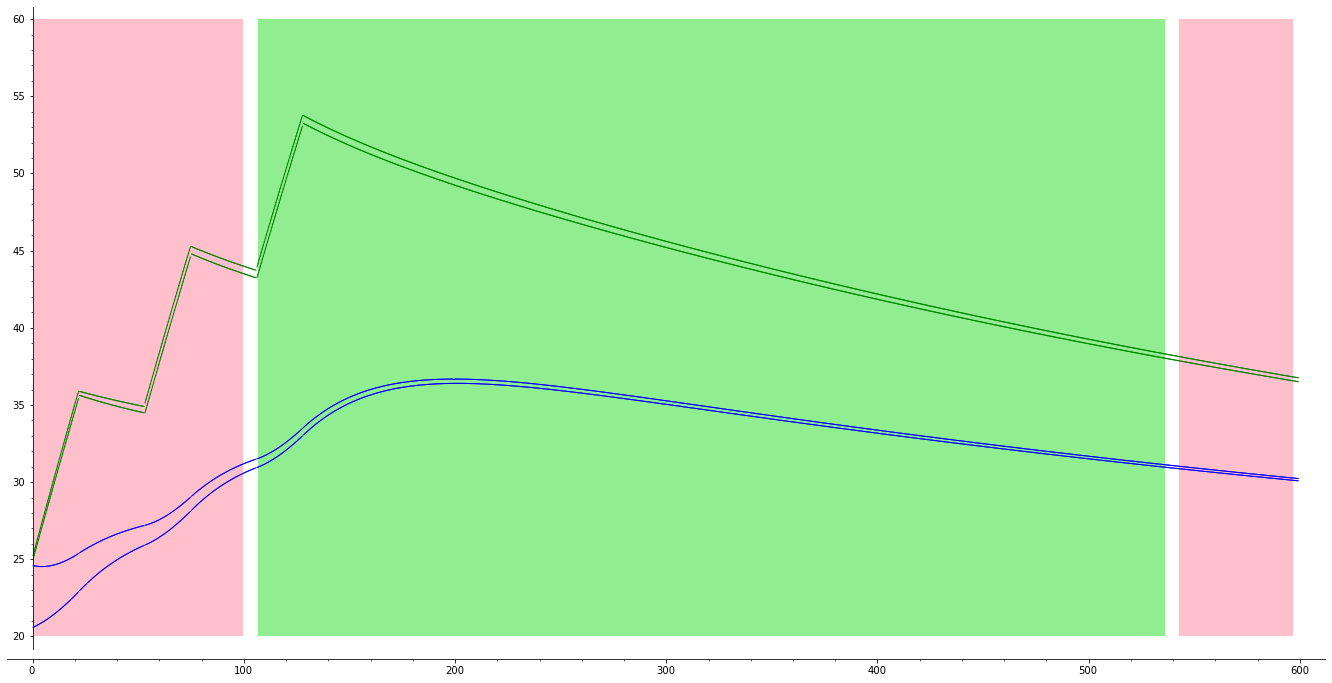

In [26]:
p1 = p + Atomic(T_A > RIF(31)).signal(res).plot(y_range=(20, 60))
p1.set_aspect_ratio('automatic')
p1.matplotlib()

In G.signal
mask for G = None


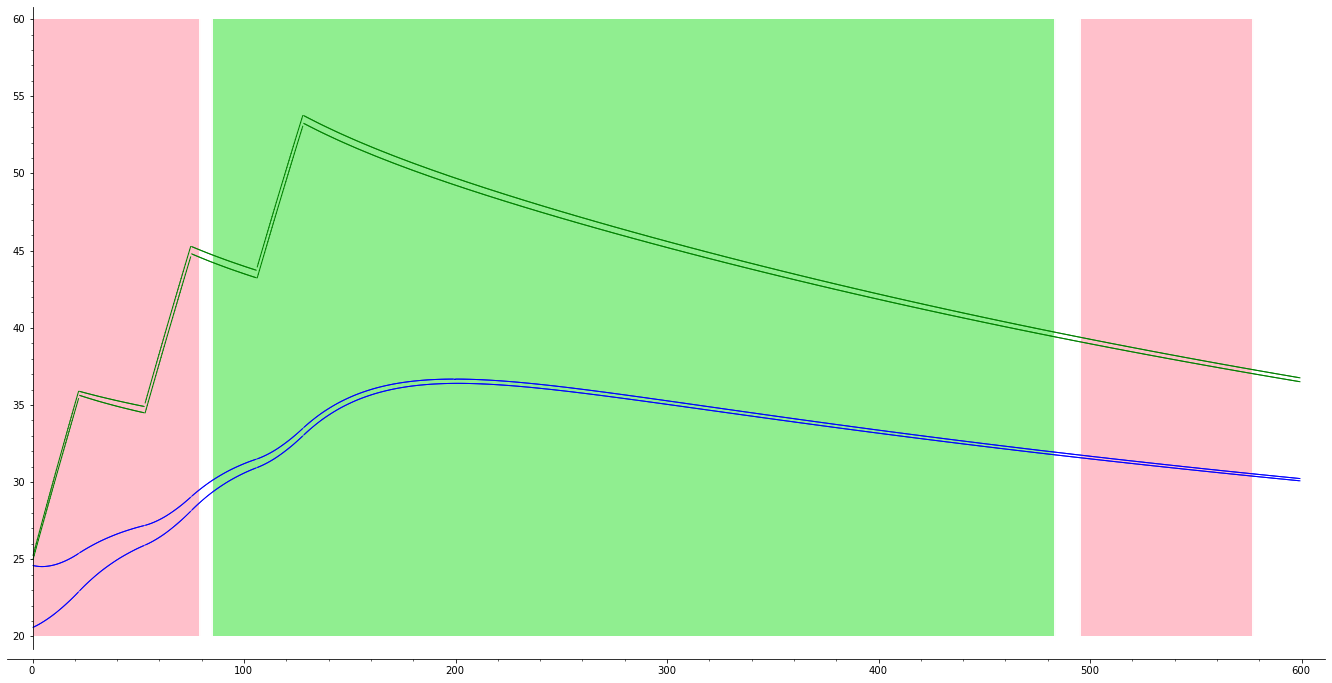

In [27]:
p2 = p + G(RIF(20, 50), Atomic(T_A > RIF(31))).signal(res).plot(y_range=(20, 60))
p2.set_aspect_ratio('automatic')
p2.matplotlib()

mask for F = None


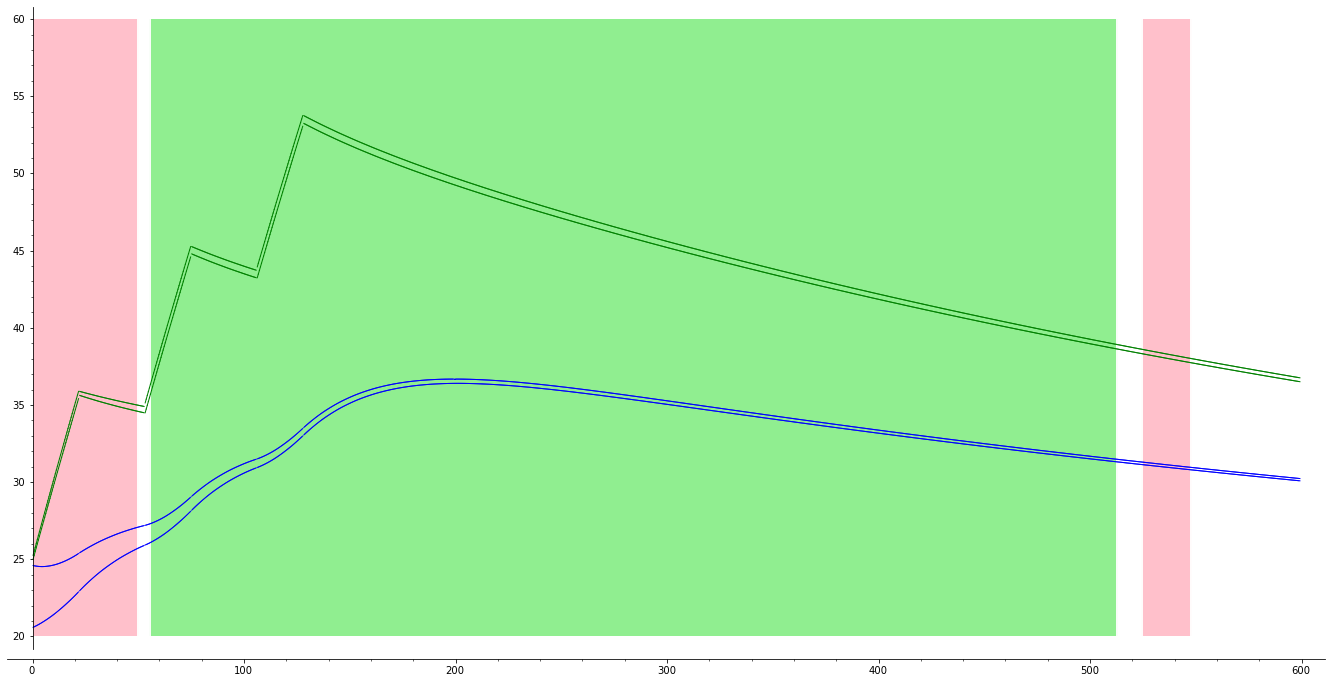

In [28]:
p3 = p + F(RIF(20, 50), Atomic(T_A > RIF(31))).signal(res).plot(y_range=(20, 60))
p3.set_aspect_ratio('automatic')
p3.matplotlib()